In [279]:
# Importing libs
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('house_data.csv')

df.tail()

price  surface  arrondissement
822    850    35.00            10.0
823    700    10.00            10.0
824   1280    34.00            10.0
825   1545    65.00            10.0
826   1000    21.43            10.0

In [280]:
df.describe()

price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000

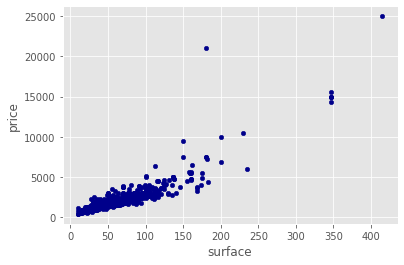

In [281]:
# plotting price per surface
df.plot.scatter(x="surface", y="price", c="Darkblue")

# Approach 1 : 1 feature Linear Regression

_Cleaning dataset for predictions_

In [282]:
df = df.dropna()

x_data = df["surface"].values
y_data = df["price"].values

#splitting into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


_Training on simple Linear Reg_

In [283]:
#training the model

regr = linear_model.LinearRegression()

regr.fit(x_train.reshape(-1, 1), y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -234.18677138265457
Coefficients: 
 [38.80110748]


In [284]:
predict_y = regr.predict(x_test.reshape(-1, 1))

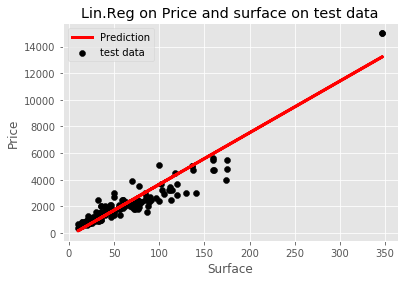

mean_squared_error:
445062.9678155552


In [285]:
plt.figure()
plt.title("Lin.Reg on Price and surface on test data")
plt.scatter(x_test, y_test, color="black", label="test data")
plt.plot(x_test, predict_y, color="red", label="Prediction", linewidth=3)
plt.xlabel("Surface")
plt.ylabel("Price")
plt.legend()
plt.show()

y_test.mean()

print("mean_squared_error:")

one_feature_msqe=mean_squared_error(y_test, predict_y)
print(one_feature_msqe)

# Approach 2 : Two feature for Linear Regression

In [286]:
# Average price per arrondissement
avg_price_per_district = df.groupby(["arrondissement"]).mean()

avg_price_per_district.tail()

price    surface
arrondissement                        
1.0             2878.524390  76.259207
2.0             1623.015385  45.934462
3.0             1833.005714  54.606343
4.0             2326.145251  63.406927
10.0            1334.747126  47.872471

In [287]:
df = df.dropna()

x_data = df[["surface","arrondissement"]].values
y_data = df["price"].values

#splitting into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [288]:
print(x_train.shape)
print(y_train.shape)



(657, 2)
(657,)


In [289]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4.421726526845987
Coefficients: 
 [ 37.32040456 -38.21485811]


In [290]:
predict_y = regr.predict(x_test)

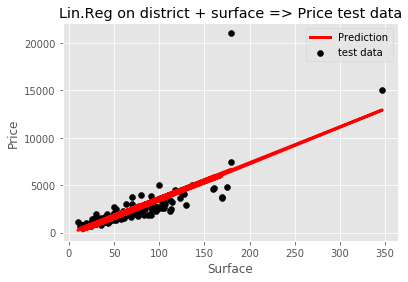

mean_squared_error:
1631079.8410004824


In [291]:
plt.figure()
plt.style.use('ggplot')
plt.title("Lin.Reg on district + surface => Price test data")
plt.scatter(x_test[:,0], y_test, color="black", label="test data")
plt.plot(x_test[:,0], predict_y, color="red", label="Prediction", linewidth=3)
plt.xlabel("Surface")
plt.ylabel("Price")
plt.legend()
plt.show()

y_test.mean()

print("mean_squared_error:")
two_feature_msqe = mean_squared_error(y_test, predict_y)
print(two_feature_msqe)

# Approach 3 : Two feature for Linear Regression and District Average


In [292]:
df = pd.read_csv('house_data.csv')


mean_price = df.groupby("arrondissement").mean()["price"]

df = df.merge(mean_price, on="arrondissement", how="left")
df = df.rename(columns={"price_x": "price", "price_y":"arrondissement_avg"})



In [293]:
df.head()

price  surface  arrondissement  arrondissement_avg
0   1820     46.1             1.0          2878.52439
1   1750     41.0             1.0          2878.52439
2   1900     55.0             1.0          2878.52439
3   1950     46.0             1.0          2878.52439
4   1950     49.0             1.0          2878.52439

In [294]:
df = df.dropna()

x_data = df[["surface","arrondissement", "arrondissement_avg"]].values
y_data = df["price"].values

#splitting into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [295]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -110.90159158509277
Coefficients: 
 [ 32.83499033 -34.98730968   0.1575471 ]


In [296]:
predict_y = regr.predict(x_test)

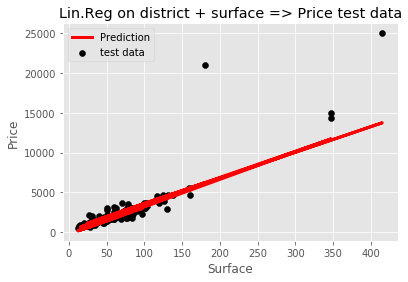

2348658.020511876


In [297]:
plt.figure()
plt.style.use('ggplot')
plt.title("Lin.Reg on district + surface => Price test data")
plt.scatter(x_test[:,0], y_test, color="black", label="test data")
plt.plot(x_test[:,0], predict_y, color="red", label="Prediction", linewidth=3)
plt.xlabel("Surface")
plt.ylabel("Price")
plt.legend()
plt.show()

y_test.mean()

two_feature_wit_avg_msqe=mean_squared_error(y_test, predict_y)
print(two_feature_wit_avg_msqe)

# Model Results 

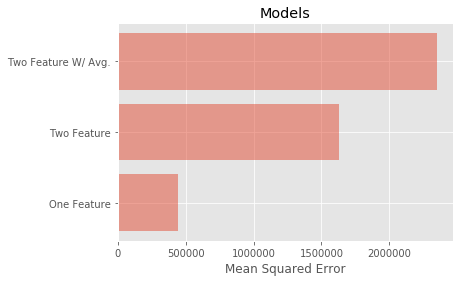

In [298]:
models = ("One Feature", "Two Feature", "Two Feature W/ Avg.")
y_pos = np.arange(len(models))
mean_squared_errors = (one_feature_msqe, two_feature_msqe ,two_feature_wit_avg_msqe )

plt.barh(y_pos, mean_squared_errors, align='center', alpha=0.5)
plt.yticks(y_pos, models)
plt.xlabel('Mean Squared Error')
plt.title('Models')

plt.show()